In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Delhi_AQI.csv')
df.dtypes

City      object
Date      object
PM2.5    float64
PM10     float64
NO2      float64
CO       float64
SO2      float64
O3       float64
AQI        int64
dtype: object

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO2,CO,SO2,O3,AQI
0,Delhi,01-01-2015,313.22,607.98,36.39,15.20,9.25,41.68,472
1,Delhi,02-01-2015,186.18,269.55,32.87,9.54,6.65,29.97,454
2,Delhi,03-01-2015,87.18,131.90,30.31,10.61,2.65,19.71,143
3,Delhi,04-01-2015,151.84,241.84,36.91,11.54,4.63,25.36,319
4,Delhi,05-01-2015,146.60,219.13,34.92,9.20,3.33,23.20,325


In [4]:
df.describe()

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
count,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000
mean,121.556858,235.223296,51.259532,2.065088,15.931313,51.798931,268.916002
std,83.439987,121.868136,22.176111,2.486139,7.986281,26.093444,115.441716
min,10.240000,19.510000,13.430000,0.000000,2.650000,6.940000,51.000000
25%,61.040000,139.150000,34.530000,0.960000,10.380000,34.210000,175.000000
50%,98.630000,218.140000,47.600000,1.280000,14.470000,44.900000,266.000000
75%,159.800000,313.670000,63.680000,1.920000,19.820000,61.040000,351.000000
max,685.360000,796.880000,162.500000,30.440000,71.560000,257.730000,716.000000


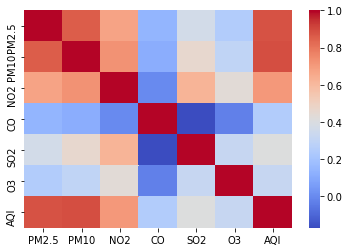

In [5]:
#Visualise the data

plt.figure()
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

In [6]:
#Selecting only 'PM2.5','PM10','NO2','SO2' based on co-relation matrix

X = df[['PM2.5','PM10','NO2','SO2']]
y = df['AQI']

In [7]:
#Split the dataset into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [8]:
# Fit the model over the training data

from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train.ravel())

SVR()

In [9]:
y_pred = regressor.predict(X_test)

y_arr = np.array(y_test)

Text(0.5, 1.0, 'Actual VS Predicted AQI Value')

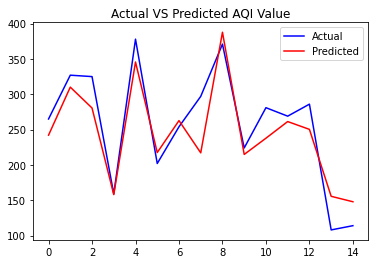

In [10]:
plt.plot(y_arr[15:30].ravel(), color='blue', animated=True, label = 'Actual')
plt.plot(y_pred[15:30].ravel(),color='red',animated=True, label = 'Predicted')
plt.legend()
plt.title('Actual VS Predicted AQI Value')

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_arr, y_pred)

0.81